In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Week8_Iris.csv")

In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# print unique class labels
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# print no.of examples for each class label
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
df=df.drop('Id',axis=1)

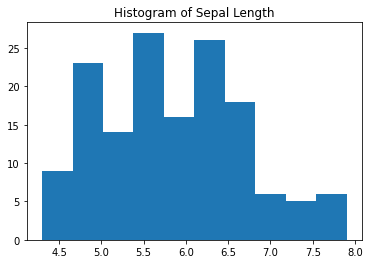

In [14]:
plt.hist(df['SepalLengthCm'])
plt.title('Histogram of Sepal Length')
plt.show()


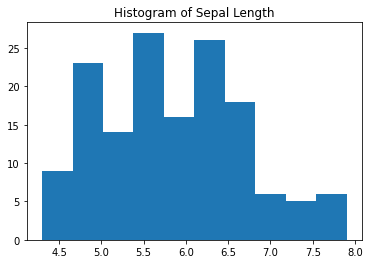

In [15]:
plt.hist(df['SepalLengthCm'])
plt.title('Histogram of Sepal Length')
plt.show()

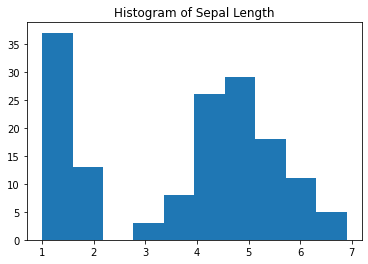

In [16]:
plt.hist(df['PetalLengthCm'])
plt.title('Histogram of Sepal Length')
plt.show()

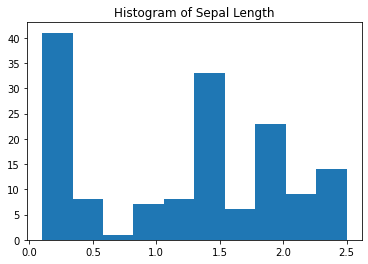

In [17]:
plt.hist(df['PetalWidthCm'])
plt.title('Histogram of Sepal Length')
plt.show()

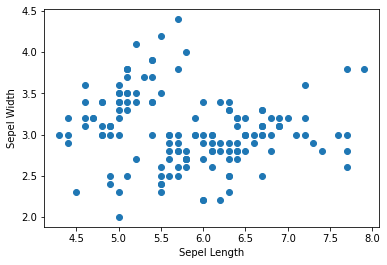

In [18]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('Sepel Length')
plt.ylabel('Sepel Width')
plt.show()

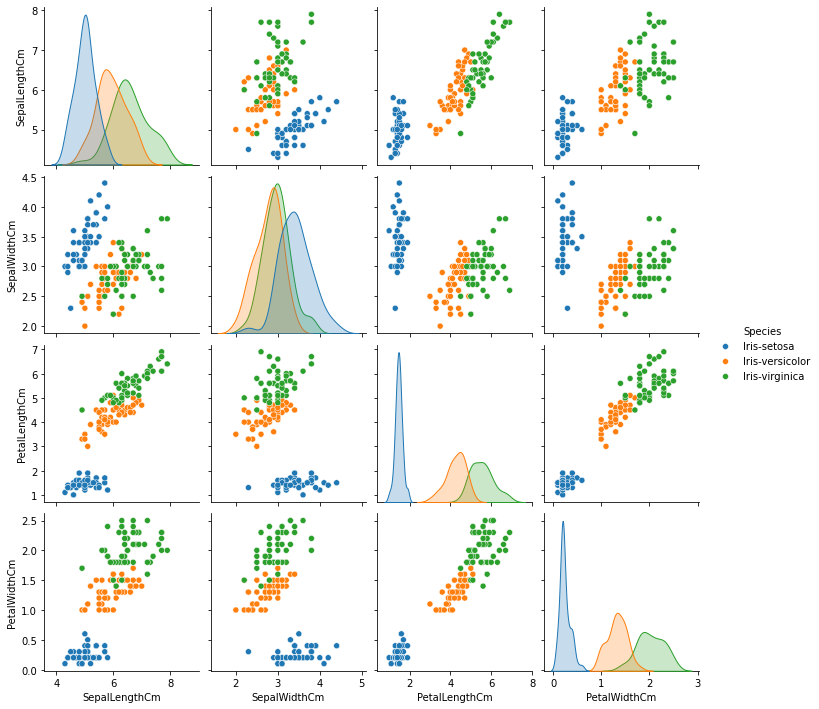

In [19]:
import seaborn as sns

sns.pairplot(df, hue='Species')
plt.show()

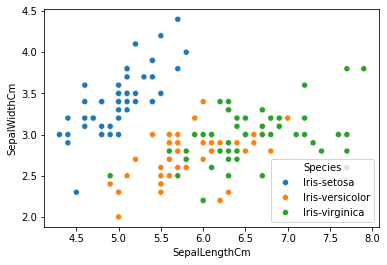

In [20]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.show()

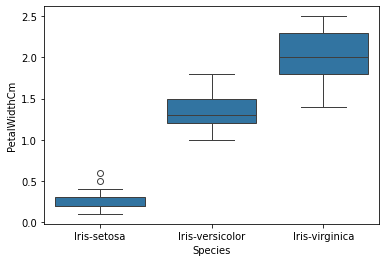

In [21]:
# box plot of petal width

sns.boxplot(data=df,x='Species', y='PetalWidthCm')
plt.show()

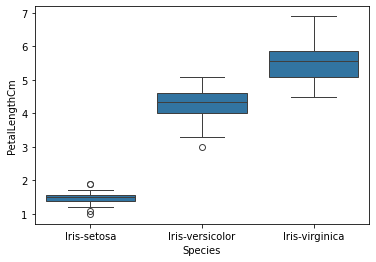

In [22]:
sns.boxplot(data=df,x='Species', y='PetalLengthCm')
plt.show()

In [23]:
x=df.drop('Species',axis=1)
y=df['Species']

In [24]:
x,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Ir

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((105, 4), (45, 4), (105,), (45,))

In [26]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [46]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

